In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Train.csv")
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [58]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,Month,Day,month,day
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,1,2,1,2
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,1,3,1,3
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,1,4,1,4
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,1,5,1,5
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,1,6,1,6


In [18]:
#per day and month averages of each column?
#first clean up table

In [11]:
df['Date']= pd.to_datetime(df['Date'])
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df.head(3)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,Month,Day,month,day
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,1,2,1,2
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,1,3,1,3
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.4,33.400002,...,NaN,NaN,NaN,NaN,NaN,NaN,1,4,1,4


In [39]:
#to make understanding data easier, smaller data set
smaller = df[(df["month"] < 5) & (df["day"] < 16)]
smaller = smaller.iloc[:360]

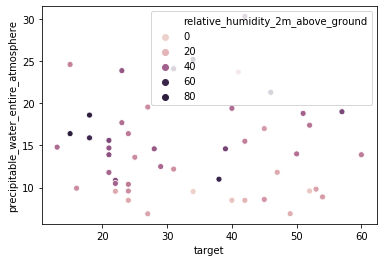

In [43]:
ax = sns.scatterplot(x="target", y="precipitable_water_entire_atmosphere", data=df[:50], hue = "relative_humidity_2m_above_ground")

In [32]:
sns.relplot?

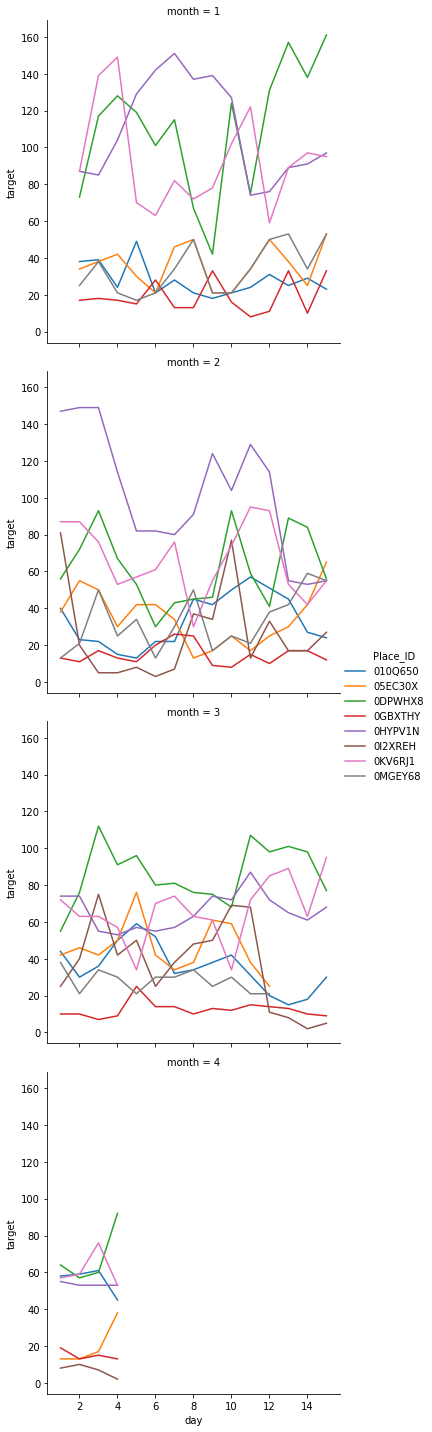

In [45]:
months_target = sns.relplot(x= "day", y = "target", data = smaller, kind = "line", hue = "Place_ID", row = "month")

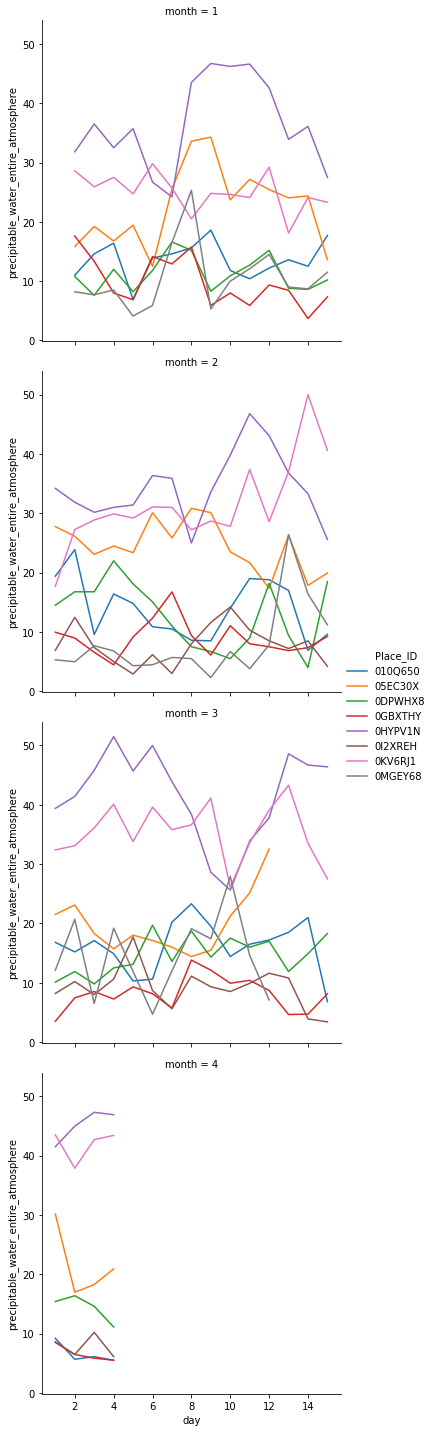

In [46]:
months_precipitation = sns.relplot(x= "day", y = "precipitable_water_entire_atmosphere", data = smaller, kind="line", hue = "Place_ID", row = "month")

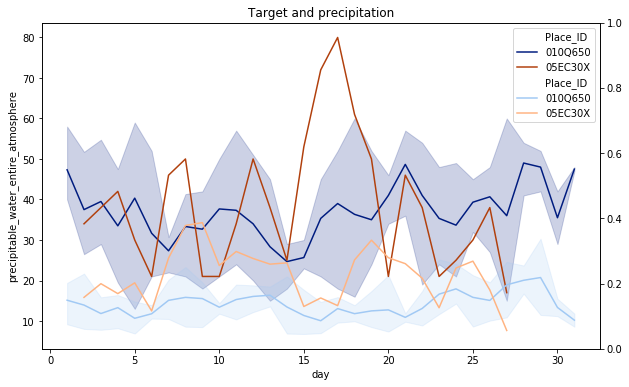

In [65]:
january = df.where(df.month == 1)
january = df.iloc[:120]

f, axes = plt.subplots(figsize=(10,6))

ax0 = sns.lineplot(x="day", y="target", data=january, hue = "Place_ID", palette = "dark")
ax0.set_title("Target and precipitation")
ax1 = sns.lineplot(x="day", y="precipitable_water_entire_atmosphere", data=january, hue = "Place_ID", palette = "pastel")
ax1 = ax0.twinx()

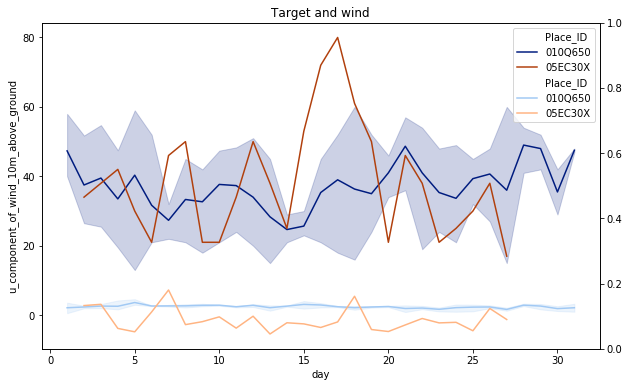

In [66]:
f, axes = plt.subplots(figsize=(10,6))

ax0 = sns.lineplot(x="day", y="target", data=january, hue = "Place_ID", palette = "dark")
ax0.set_title("Target and wind")
ax1 = sns.lineplot(x="day", y="u_component_of_wind_10m_above_ground", data=january, hue = "Place_ID", palette = "pastel")
ax1 = ax0.twinx()

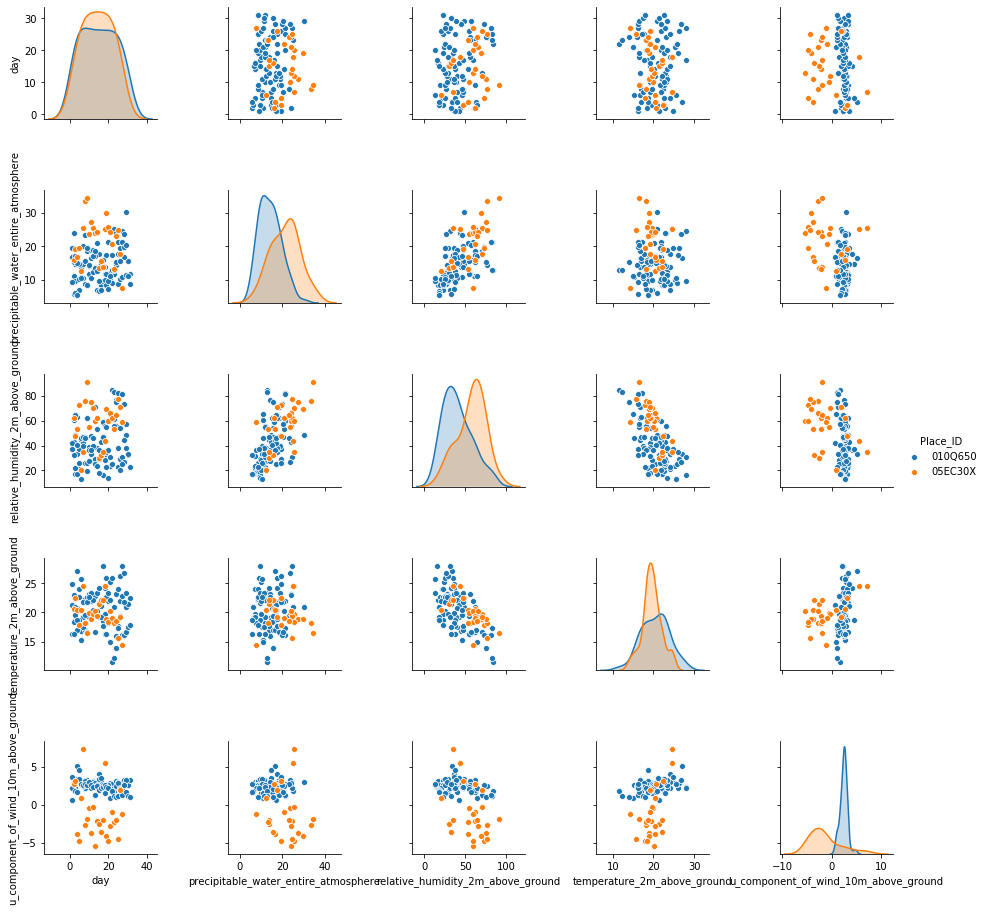

In [69]:
sns.pairplot(january, hue = "Place_ID", vars=["day", "precipitable_water_entire_atmosphere", "relative_humidity_2m_above_ground", 'temperature_2m_above_ground','u_component_of_wind_10m_above_ground'])